In [1]:
print('Hello, World!') 

Hello, World!


In [1]:
import my_code.datasets.shape_dataset as shape_dataset

dataset_faust_orig = shape_dataset.SingleShapeDataset(
    data_root = 'data_with_smpl_corr/FAUST_original',
    centering = 'bbox',
    return_faces=True,
    return_evecs=True,
    num_evecs=64,
    return_corr=True,
    return_dist=False,
    lb_cache_dir=None
)
dataset_faust_r = shape_dataset.SingleShapeDataset(
    data_root = 'data_with_smpl_corr/FAUST_r',
    centering = 'bbox',
    return_faces=True,
    return_evecs=True,
    num_evecs=64,
    return_corr=True,
    return_dist=False,
    lb_cache_dir=None
)
dataset_faust_a = shape_dataset.SingleShapeDataset(
    data_root = 'data_with_smpl_corr/FAUST_a',
    centering = 'bbox',
    return_faces=True,
    return_evecs=True,
    num_evecs=64,
    return_corr=True,
    return_dist=False,
    lb_cache_dir=None
)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [8]:
data_orig = dataset_faust_orig[91]
data_r = dataset_faust_r[91]
data_a = dataset_faust_a[11]

In [6]:
import trimesh

scene = trimesh.Scene()

In [ ]:
mesh_orig = trimesh.Trimesh(
    vertices=data_orig['verts'],
    faces=data_orig['faces']
    )
mesh_r = trimesh.Trimesh(
    vertices=data_r['verts'].numpy() + [0, 0, 0],
    faces=data_r['faces'],
    face_colors=[255, 0, 0, 100]
    )
mesh_a = trimesh.Trimesh(
    vertices=data_a['verts'].numpy() + [0, 0, 0],
    faces=data_a['faces'],
    face_colors=[0, 255, 0, 100]
    )

scene.geometry.clear()

scene.add_geometry(mesh_orig)
scene.add_geometry(mesh_r)
scene.add_geometry(mesh_a)

scene.show()

In [2]:
dataset_shrec = shape_dataset.SingleShapeDataset(
    data_root = 'data_with_smpl_corr/SHREC19_original',
    centering = 'bbox',
    return_faces=True,
    return_evecs=True,
    num_evecs=64,
    return_corr=True,
    return_dist=False,
    lb_cache_dir=None
)
dataset_surreal = shape_dataset.SingleShapeDataset(
    data_root = 'data_with_smpl_corr/SURREAL_test',
    centering = 'bbox',
    return_faces=True,
    return_evecs=True,
    num_evecs=64,
    return_corr=True,
    return_dist=False,
    lb_cache_dir=None
)

In [11]:
data_shrec = dataset_shrec[32]
data_surreal = dataset_surreal[32]

In [ ]:
mesh_shrec = trimesh.Trimesh(
    vertices=data_shrec['verts'].numpy() + [-2, 0, 0],
    faces=data_shrec['faces']
    )
mesh_surreal = trimesh.Trimesh(
    vertices=data_surreal['verts'].numpy() + [-1, 0, 0],
    faces=data_surreal['faces'],
    face_colors=[0, 0, 255, 100]
    )

scene.add_geometry(mesh_shrec)
scene.add_geometry(mesh_surreal)

scene.show()

# Template datasets

In [3]:
import my_code.datasets.template_dataset as template_dataset
import numpy as np

dataset_faust_orig_template = template_dataset.TemplateDataset(
    base_dataset=dataset_faust_orig,
    template_path='data/SURREAL_full/template/template.ply',
    template_corr=list(range(6890)),
    num_evecs=dataset_faust_orig.num_evecs,
    return_Cxy=True,
    preload_base_dataset=False
)
dataset_faust_r_template = template_dataset.TemplateDataset(
    base_dataset=dataset_faust_r,
    template_path='data/SURREAL_full/template/template.ply',
    template_corr=np.loadtxt('data_with_smpl_corr/FAUST_r/sampleID.vts', dtype=int) - 1,
    num_evecs=dataset_faust_r.num_evecs,
    return_Cxy=True,
    preload_base_dataset=False
)
dataset_faust_a_template = template_dataset.TemplateDataset(
    base_dataset=dataset_faust_a,
    template_path='data/SURREAL_full/template/template.ply',
    template_corr=list(range(6890)),
    num_evecs=dataset_faust_a.num_evecs,
    return_Cxy=True,
    preload_base_dataset=False
)
dataset_shrec_template = template_dataset.TemplateDataset(
    base_dataset=dataset_shrec,
    template_path='data/SURREAL_full/template/template.ply',
    template_corr=list(range(6890)),
    num_evecs=dataset_shrec.num_evecs,
    return_Cxy=True,
    preload_base_dataset=False
)
dataset_surreal_template = template_dataset.TemplateDataset(
    base_dataset=dataset_surreal,
    template_path='data/SURREAL_full/template/template.ply',
    template_corr=list(range(6890)),
    num_evecs=dataset_surreal.num_evecs,
    return_Cxy=True,
    preload_base_dataset=False
)

In [4]:
import torch
import matplotlib.pyplot as plt


def plot_fmap_and_meshes(dataset, idx):
    # data_orig_12 = dataset_faust_orig_template[82]
    
    data_orig_12 = dataset[idx]

    mesh_orig_12 = trimesh.Trimesh(
        vertices=data_orig_12['second']['verts'],
        faces=data_orig_12['second']['faces']
        )
    template_orig_12 = trimesh.Trimesh(
        vertices=data_orig_12['first']['verts'] + torch.tensor([0.0, 0, 0]),
        faces=data_orig_12['first']['faces'],
        face_colors=[255, 0, 0, 100]
    )
    
    print(mesh_orig_12, template_orig_12)

    plot = plt.imshow(data_orig_12['second']['C_gt_xy'][0], cmap='bwr', vmin=-1, vmax=1)
    plt.colorbar(plot)

    plt.show()

    scene.geometry.clear()

    scene.add_geometry(mesh_orig_12)
    scene.add_geometry(template_orig_12)

    scene.show()

<trimesh.Trimesh(vertices.shape=(12500, 3), faces.shape=(25000, 3))> <trimesh.Trimesh(vertices.shape=(6890, 3), faces.shape=(13776, 3))>


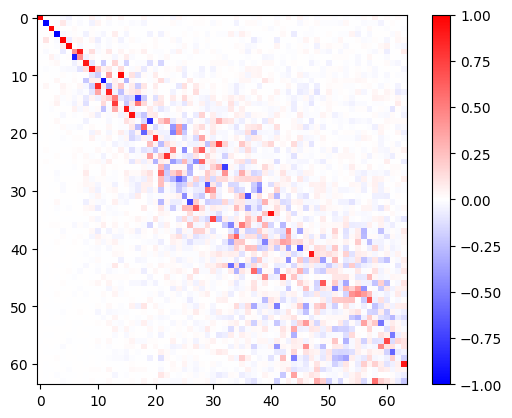

In [15]:
# plot_fmap_and_meshes(dataset_faust_orig_template, 8)
# plot_fmap_and_meshes(dataset_faust_r_template, 88)
# plot_fmap_and_meshes(dataset_faust_a_template, 8)
plot_fmap_and_meshes(dataset_shrec_template, 28)
# plot_fmap_and_meshes(dataset_surreal_template, 118)
scene.show()

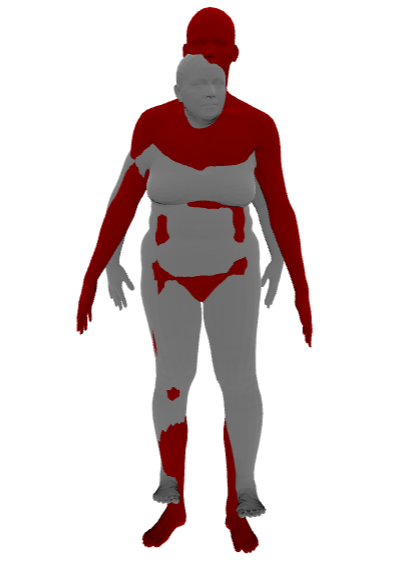

# Check surreal normalization

In [3]:
mesh_surreal_orig = trimesh.load('/home/s94zalek_hpc/shape_matching/data_with_smpl_corr/SURREAL_test/off/tr_reg_001.off')
mesh_template = trimesh.load(f'/home/s94zalek_hpc/shape_matching/data/SURREAL_full/template/template.ply')

mesh_surreal_orig, mesh_template

(<trimesh.Trimesh(vertices.shape=(6890, 3), faces.shape=(13776, 3), name=`tr_reg_001.off`)>,
 <trimesh.Trimesh(vertices.shape=(6890, 3), faces.shape=(13776, 3), name=`template.ply`)>)

In [4]:
from utils.geometry_util import laplacian_decomposition, get_operators

sqrt_area_surreal = laplacian_decomposition(verts=mesh_surreal_orig.vertices, faces=mesh_surreal_orig.faces, k=1)[-1]
sqrt_area_template = laplacian_decomposition(verts=mesh_template.vertices, faces=mesh_template.faces, k=1)[-1]

print(f'Area of surreal: {sqrt_area_surreal}, area of template: {sqrt_area_template}')

Area of surreal: 1.3497835096016626, area of template: 1.3311199303787813


In [ ]:
scene.geometry.clear()

scene.add_geometry(mesh_surreal_orig)
scene.add_geometry(mesh_template)

scene.show()